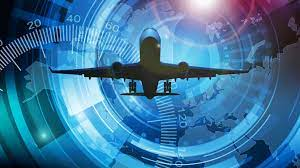

# Aviation Incidents

# Overview


This Project analyzes which airplane types that will have the least amount of incidents and how many engines each plane has. Using descriptive analysis with the aviation data set to narrow down the best plane with the lowest amount of risks. Cleaning the data finding the best plane for low risk flying. Showing a visualization to have a clear understanding to generate insight for the company.

# Business Understanding
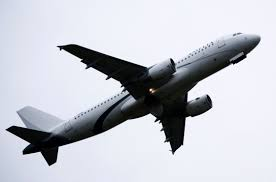

The head of the aviation division may be able to chose an airplane model that is low in potential risk of failure through the least amount of incidents and how many engines a plane has. Doing so the company can continue to grow in the aviation division. Using aviation data set, I will be showing the model of airplanes with the least amount of incidents and the amount of engines they have.

# Data Understanding 

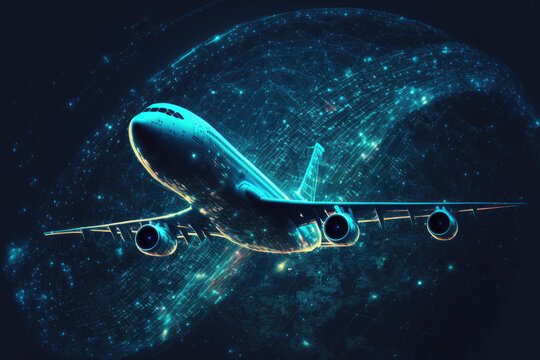

In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
aviation_data = pd.read_csv("./data/Aviation_Data.csv", low_memory=False)

In [3]:
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

## Aviation Data
The aviation dataset includes records from 1962 to 2023, and includes models of plane, number of engines, and injury severity.

In [4]:
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
aviation_data['Accident Date'] =  pd.to_datetime(aviation_data['Event.Date'])
aviation_data['Accident Date'].describe()

count                            88889
mean     1999-09-17 17:13:39.354476032
min                1948-10-24 00:00:00
25%                1989-01-15 00:00:00
50%                1998-07-18 00:00:00
75%                2009-07-01 00:00:00
max                2022-12-29 00:00:00
Name: Accident Date, dtype: object

## Number of Engines data

In [6]:
aviation_data['Number.of.Engines'].value_counts()

Number.of.Engines
1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: count, dtype: int64

## Model

In [7]:
aviation_data['Model'].value_counts()

Model
152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
GC-1-A              1
737-3S3             1
MBB-BK117-B2        1
GLASSAIR GL25       1
M-8 EAGLE           1
Name: count, Length: 12318, dtype: int64

## Injury Severity

In [8]:
aviation_data['Injury.Severity'].value_counts()

Injury.Severity
Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(270)        1
Fatal(60)         1
Fatal(43)         1
Fatal(143)        1
Fatal(230)        1
Name: count, Length: 109, dtype: int64

# Data Preperation

## Data Cleaning

For the aviation incident files, I'll make them easier to work with by narrowing the columns down and dropping unneecessary columns.

In [9]:
# look up columns
aviation_data.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Accident Date'],
      dtype='object')

In [10]:
# Narrowing down the dataset to 3 columns
aviation_data = aviation_data[['Model', 'Injury.Severity', 'Number.of.Engines']]

In [11]:
aviation_data.head()

,Model,Injury.Severity,Number.of.Engines
0,108-3,Fatal(2),1.0
1,PA24-180,Fatal(4),1.0
2,172M,Fatal(3),1.0
3,112,Fatal(2),1.0
4,501,Fatal(1),NaN


In [12]:
# I will drop NaN from the dataset
aviation_data = aviation_data.dropna(inplace=False,how='any',axis=0)
aviation_data

,Model,Injury.Severity,Number.of.Engines
0,108-3,Fatal(2),1.0
1,PA24-180,Fatal(4),1.0
2,172M,Fatal(3),1.0
3,112,Fatal(2),1.0
5,DC9,Non-Fatal,2.0
...,...,...,...
90328,PA42,Non-Fatal,2.0
90332,SR22,Non-Fatal,1.0
90335,SA226TC,Non-Fatal,2.0
90336,R172K,Minor,1.0


In [13]:
aviation_data.head()

,Model,Injury.Severity,Number.of.Engines
0,108-3,Fatal(2),1.0
1,PA24-180,Fatal(4),1.0
2,172M,Fatal(3),1.0
3,112,Fatal(2),1.0
5,DC9,Non-Fatal,2.0


Looking for duplicates to reduce any inaccurate data.

In [14]:
# look for duplicates in dataset
aviation_data.duplicated()

0        False
1        False
2        False
3        False
5        False
         ...  
90328     True
90332     True
90335     True
90336     True
90345     True
Length: 82488, dtype: bool

In [15]:
# Drop duplicates 
aviation_data.drop_duplicates(inplace=True)
aviation_data

,Model,Injury.Severity,Number.of.Engines
0,108-3,Fatal(2),1.0
1,PA24-180,Fatal(4),1.0
2,172M,Fatal(3),1.0
3,112,Fatal(2),1.0
5,DC9,Non-Fatal,2.0
...,...,...,...
90306,KITFOX S5,Non-Fatal,1.0
90307,M-8 EAGLE,Minor,1.0
90313,EC 130 B4,Minor,1.0
90317,PA-44,Minor,2.0


In [16]:
aviation_data.head(15)

,Model,Injury.Severity,Number.of.Engines
0,108-3,Fatal(2),1.0
1,PA24-180,Fatal(4),1.0
2,172M,Fatal(3),1.0
3,112,Fatal(2),1.0
5,DC9,Non-Fatal,2.0
6,180,Fatal(4),1.0
7,140,Non-Fatal,1.0
8,401B,Non-Fatal,2.0
9,NAVION L-17B,Non-Fatal,1.0
10,PA-28-161,Non-Fatal,1.0


In [17]:
# Group the columns together
aviation_data.groupby(['Injury.Severity','Number.of.Engines'])

In [18]:
aviation_data.groupby(['Injury.Severity','Number.of.Engines']).mean(numeric_only=True)

Empty DataFrame
Columns: []
Index: [(Fatal, 0.0), (Fatal, 1.0), (Fatal, 2.0), (Fatal, 3.0), (Fatal, 4.0), (Fatal(1), 0.0), (Fatal(1), 1.0), (Fatal(1), 2.0), (Fatal(1), 3.0), (Fatal(1), 4.0), (Fatal(10), 0.0), (Fatal(10), 1.0), (Fatal(10), 2.0), (Fatal(102), 2.0), (Fatal(11), 2.0), (Fatal(110), 2.0), (Fatal(111), 3.0), (Fatal(113), 2.0), (Fatal(12), 2.0), (Fatal(13), 0.0), (Fatal(13), 2.0), (Fatal(131), 3.0), (Fatal(132), 2.0), (Fatal(135), 3.0), (Fatal(14), 2.0), (Fatal(14), 3.0), (Fatal(144), 4.0), (Fatal(15), 2.0), (Fatal(153), 3.0), (Fatal(154), 2.0), (Fatal(156), 2.0), (Fatal(16), 2.0), (Fatal(17), 1.0), (Fatal(17), 2.0), (Fatal(174), 4.0), (Fatal(18), 2.0), (Fatal(19), 2.0), (Fatal(2), 0.0), (Fatal(2), 1.0), (Fatal(2), 2.0), (Fatal(2), 3.0), (Fatal(2), 4.0), (Fatal(20), 2.0), (Fatal(21), 2.0), (Fatal(217), 2.0), (Fatal(228), 4.0), (Fatal(23), 2.0), (Fatal(230), 4.0), (Fatal(25), 1.0), (Fatal(25), 2.0), (Fatal(256), 4.0), (Fatal(265), 2.0), (Fatal(27), 2.0), (Fatal(27), 4.0), (Fatal(270), 4.0), (Fatal(28), 2.0), (Fatal(29), 2.0), (Fatal(29), 3.0), (Fatal(3), 0.0), (Fatal(3), 1.0), (Fatal(3), 2.0), (Fatal(3), 4.0), (Fatal(30), 2.0), (Fatal(31), 2.0), (Fatal(34), 2.0), (Fatal(37), 2.0), (Fatal(4), 0.0), (Fatal(4), 1.0), (Fatal(4), 2.0), (Fatal(4), 4.0), (Fatal(43), 4.0), (Fatal(47), 0.0), (Fatal(49), 2.0), (Fatal(5), 0.0), (Fatal(5), 1.0), (Fatal(5), 2.0), (Fatal(5), 3.0), (Fatal(5), 4.0), (Fatal(6), 0.0), (Fatal(6), 1.0), (Fatal(6), 2.0), (Fatal(6), 3.0), (Fatal(6), 4.0), (Fatal(60), 2.0), (Fatal(65), 2.0), (Fatal(68), 2.0), (Fatal(7), 1.0), (Fatal(7), 2.0), (Fatal(7), 4.0), (Fatal(70), 2.0), (Fatal(70), 4.0), (Fatal(73), 4.0), (Fatal(78), 2.0), (Fatal(8), 0.0), (Fatal(8), 1.0), (Fatal(8), 2.0), (Fatal(8), 3.0), (Fatal(82), 1.0), (Fatal(82), 2.0), (Fatal(87), 0.0), ...]

[127 rows x 0 columns]

In [19]:
aviation_data.groupby('Number.of.Engines').sum().agg(['count'])

,Model,Injury.Severity
count,7,7


In [20]:
# Save cleaned dataset as csv
aviation_data.to_csv('aviation_datamodelenginjur.csv')

# Exploratory Data Analysiss

In [21]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

### Number of Engines, Models, and Injury Severity

In [22]:
# Summarize Number of Engines
aviation_data['Number.of.Engines'].describe(include = "all")

count    17149.000000
mean         1.230976
std          0.618984
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number.of.Engines, dtype: float64

In [23]:
# Summarize Model of plane
aviation_data['Model'].describe(include = "all")

count         17149
unique        11309
top       PA-23-250
freq             17
Name: Model, dtype: object

In [24]:
# Summarize Injury Severity
aviation_data['Injury.Severity'].describe(include = "all")

count         17149
unique           67
top       Non-Fatal
freq           9448
Name: Injury.Severity, dtype: object

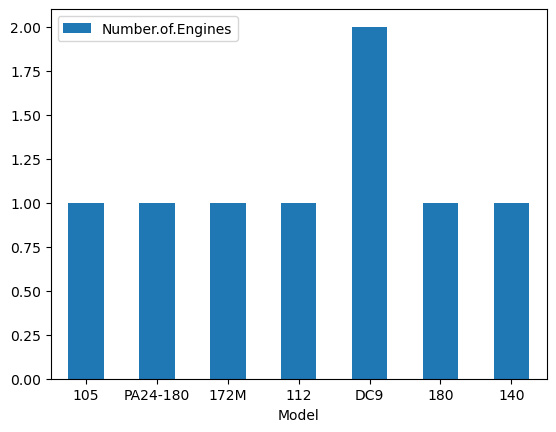

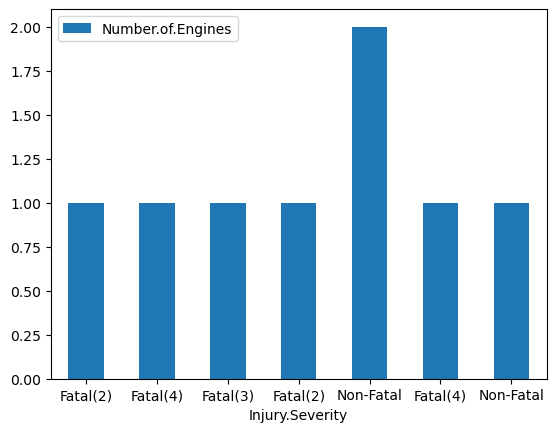

In [25]:
# Create a plot
aviation_data = pd.core.frame.DataFrame({'Model':[108-3,'PA24-180','172M','112','DC9','180','140'],'Number.of.Engines':[1.0,1.0,1.0,1.0,2.0,1.0,1.0]})

ax = aviation_data.plot.bar(x='Model', y='Number.of.Engines', rot=0)

aviation_data = pd.core.frame.DataFrame({'Injury.Severity':['Fatal(2)','Fatal(4)','Fatal(3)','Fatal(2)','Non-Fatal','Fatal(4)','Non-Fatal'], 'Number.of.Engines':[1.0,1.0,1.0,1.0,2.0,1.0,1.0]})

ax = aviation_data.plot.bar(x='Injury.Severity', y='Number.of.Engines', rot=0)

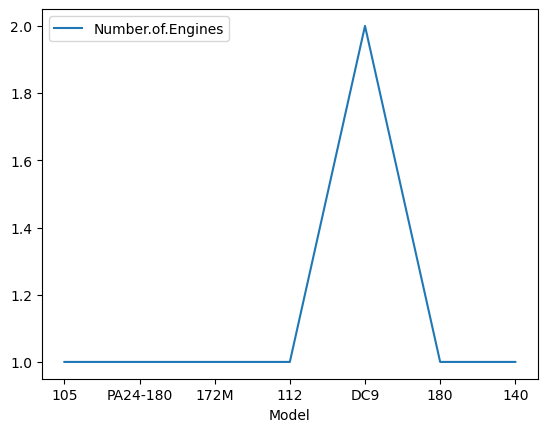

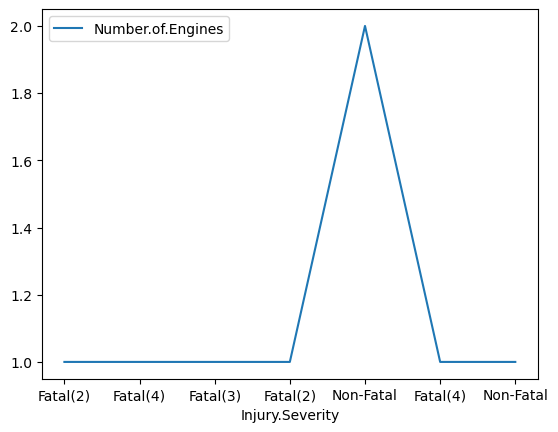

In [26]:
# Create a plot
aviation_data = pd.core.frame.DataFrame({'Model':[108-3,'PA24-180','172M','112','DC9','180','140'],'Number.of.Engines':[1.0,1.0,1.0,1.0,2.0,1.0,1.0]})

ax = aviation_data.plot.line(x='Model', y='Number.of.Engines', rot=0)

aviation_data = pd.core.frame.DataFrame({'Injury.Severity':['Fatal(2)','Fatal(4)','Fatal(3)','Fatal(2)','Non-Fatal','Fatal(4)','Non-Fatal'], 'Number.of.Engines':[1.0,1.0,1.0,1.0,2.0,1.0,1.0]})

ax = aviation_data.plot.line(x='Injury.Severity', y='Number.of.Engines', rot=0)

# Conclusions

This analysis leads with the model of plane with the least amount incidents with the ideal amount of number of engines:
- **Number of Engines.**
      On average each plane with the least amount of incidents had only one engine.

- **Model of plane.**
    DC-9 model plane has the most engines with the least amount of incidents
- **Injury Severity.**
      all injury incidents were non-fatal for the planes that fit the companies risk free decision.

# Recommendations

- **The planes with the least amount of incidents.** The company should go with the plane with non-fatal injuries for safety precautions.
- **Saving money based on how many engines there is.** The plane that has less engines and low incident reports will cost less in the future.
- **Every year evaluation.** Every year the company can expand their aviation side to gather more planes for business projects/improvements.

# Limitations

- **The data set lacks the know how.** In the data set doesn't show you how a plane had an incident, knowing that would help narrow down malfunctions or
  weather.

- **Cost of each plane.** The lack of cost for each individual plane and how much it would cost to repair them/salvage them.
  

# Next Steps

Further analyses could yield additional insights to further improve choice of model plane:

- **Better predictions for model plane based off repairing cost.** This modeling could already use avaialable data such as how bad the crash was.

- **Predicting undesirable outcomes.** Knowing that the weather is really bad should delay the flight until further notice

